In [26]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values
import pandas

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [27]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 1.75) & (games_df['odds_open_tm25'] <= 2.2)
]

Count: 415
Open profit: -14.078000000000003
Close profit: -14.683000000000002
Open ROI: -0.033922891566265066
Close ROI: -0.03538072289156627
UDI: 0.003095186319361345
AxesSubplot(0.125,0.125;0.775x0.755)


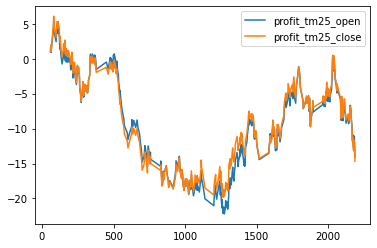

In [28]:
utils.print_total_under_result(segmented_df)

Count: 30
Open profit: -0.34199999999999986
Close profit: -2.0509999999999993
Open ROI: -0.011399999999999995
Close ROI: -0.06836666666666665
UDI: 0.0762679184120913
AxesSubplot(0.125,0.125;0.775x0.755)


,value,condition
sum_ufr_classic,4.435819,<=
sum_ufr_classic_loc,4.116348,<=


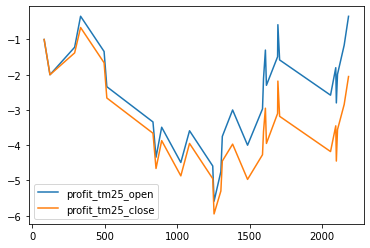

In [29]:
result = utils.create_strategy_by_udi(segmented_df, utils.metrics, 'udi_tm25')
utils.print_total_under_result(result.games_df)
result.metrics_df

Count: 4
Open profit: -2.1870000000000003
Close profit: -2.108
Open ROI: -0.5467500000000001
Close ROI: -0.527
UDI: 0.034539232150338495
AxesSubplot(0.125,0.125;0.775x0.755)


,value,condition
sum_ufr_classic,3.943727,<=
sum_ufr_classic_loc,3.519300,<=


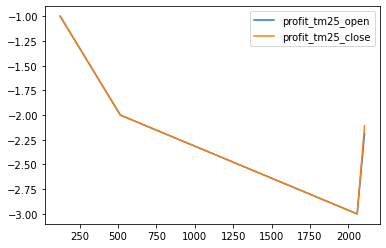

In [30]:
result = utils.create_strategy_by_udi(segmented_df, utils.metrics, 'udi_tm25', iterations=3)
utils.print_total_under_result(result.games_df)
result.metrics_df